In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Load Data

In [3]:
df=pd.read_csv("C:/Users/nithi/OneDrive/Desktop/House price/1553768847-housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Cleaning data


In [9]:
# Renameing every columns
df.columns = df.columns.str.capitalize()
df.head()

,Longitude,Latitude,Housing_median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Ocean_proximity,Median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [11]:
# To find the missing value 

df_null=df.isnull().sum()
df_null

Longitude               0
Latitude                0
Housing_median_age      0
Total_rooms             0
Total_bedrooms        207
Population              0
Households              0
Median_income           0
Ocean_proximity         0
Median_house_value      0
dtype: int64

In [13]:
# To fill up missing value we use mean()
df['Total_bedrooms']=df['Total_bedrooms'].fillna(df['Total_bedrooms'].mean())
# To check whether null value is fixed
df.isnull().sum()

Longitude             0
Latitude              0
Housing_median_age    0
Total_rooms           0
Total_bedrooms        0
Population            0
Households            0
Median_income         0
Ocean_proximity       0
Median_house_value    0
dtype: int64

In [15]:
# Checking if they have duplicates
df.duplicated().sum()

0

In [17]:
# checking datatype of each columns
df.dtypes

Longitude             float64
Latitude              float64
Housing_median_age      int64
Total_rooms             int64
Total_bedrooms        float64
Population              int64
Households              int64
Median_income         float64
Ocean_proximity        object
Median_house_value      int64
dtype: object

In [19]:
# From obj we are finding unique values 
df["Ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Data Analysis

In [22]:
# grouping Ocean_proximity
house_val_mean=df.groupby('Ocean_proximity')['Median_house_value'].mean().round(2)
house_val_df=house_val_mean.reset_index(name='Mean')
house_val_df

,Ocean_proximity,Mean
0,<1H OCEAN,240084.29
1,INLAND,124805.39
2,ISLAND,380440.00
3,NEAR BAY,259212.31
4,NEAR OCEAN,249433.98


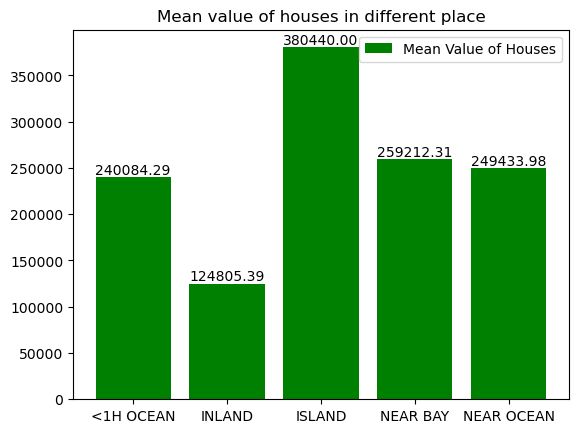

In [24]:
# ploting it using bar chart for beter understanding
a=house_val_df['Ocean_proximity']
b=house_val_df['Mean']
plt.bar(a,b,color='green',label='Mean Value of Houses')
plt.title('Mean value of houses in different place')
for index, value in enumerate(b):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.legend()

plt.show()

In [26]:
# As we found the value of house we can how much house are there

# we use groupby 
Number_of_house=df.groupby('Ocean_proximity')['Households'].sum().round(2)
household_df=Number_of_house.reset_index(name='Count')
household_df

,Ocean_proximity,Count
0,<1H OCEAN,4730118
1,INLAND,3127759
2,ISLAND,1383
3,NEAR BAY,1118931
4,NEAR OCEAN,1332308


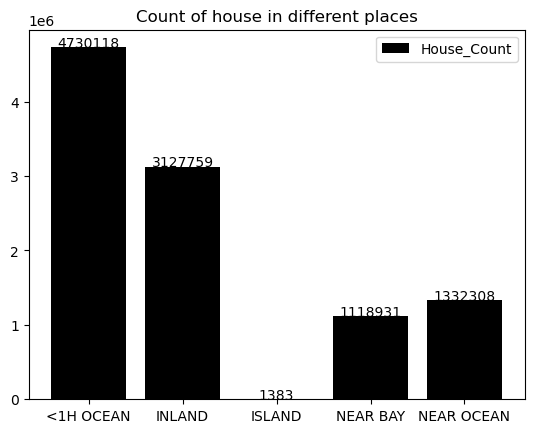

In [28]:
# Ploting chart for better undersanding

A=household_df['Ocean_proximity']
B=household_df['Count']

plt.bar(A,B,color='black',label='House_Count')
plt.title('Count of house in different places')
for i,j in enumerate(B):
    plt.text(i,j,f'{j}',ha='center')
plt.legend()
plt.show()

In [30]:
# Finding skewness of house value ,house age ,householf and Income
skew_house_val=stats.skew(df['Median_house_value']).round(2)
skew_house_age=stats.skew(df['Housing_median_age']).round(2)
skew_household=stats.skew(df['Households']).round(2)
skew_income=stats.skew(df['Median_income']).round(2)
print("Skew_house_Value:",skew_house_val)
print('Skew_household:',skew_household)
print('skew_house_age:',skew_house_age)
print('skew_income:',skew_income)

Skew_house_Value: 0.98
Skew_household: 3.41
skew_house_age: 0.06
skew_income: 1.65


Text(0.5, 1.0, 'HouseHold \n Skewness:3.41')

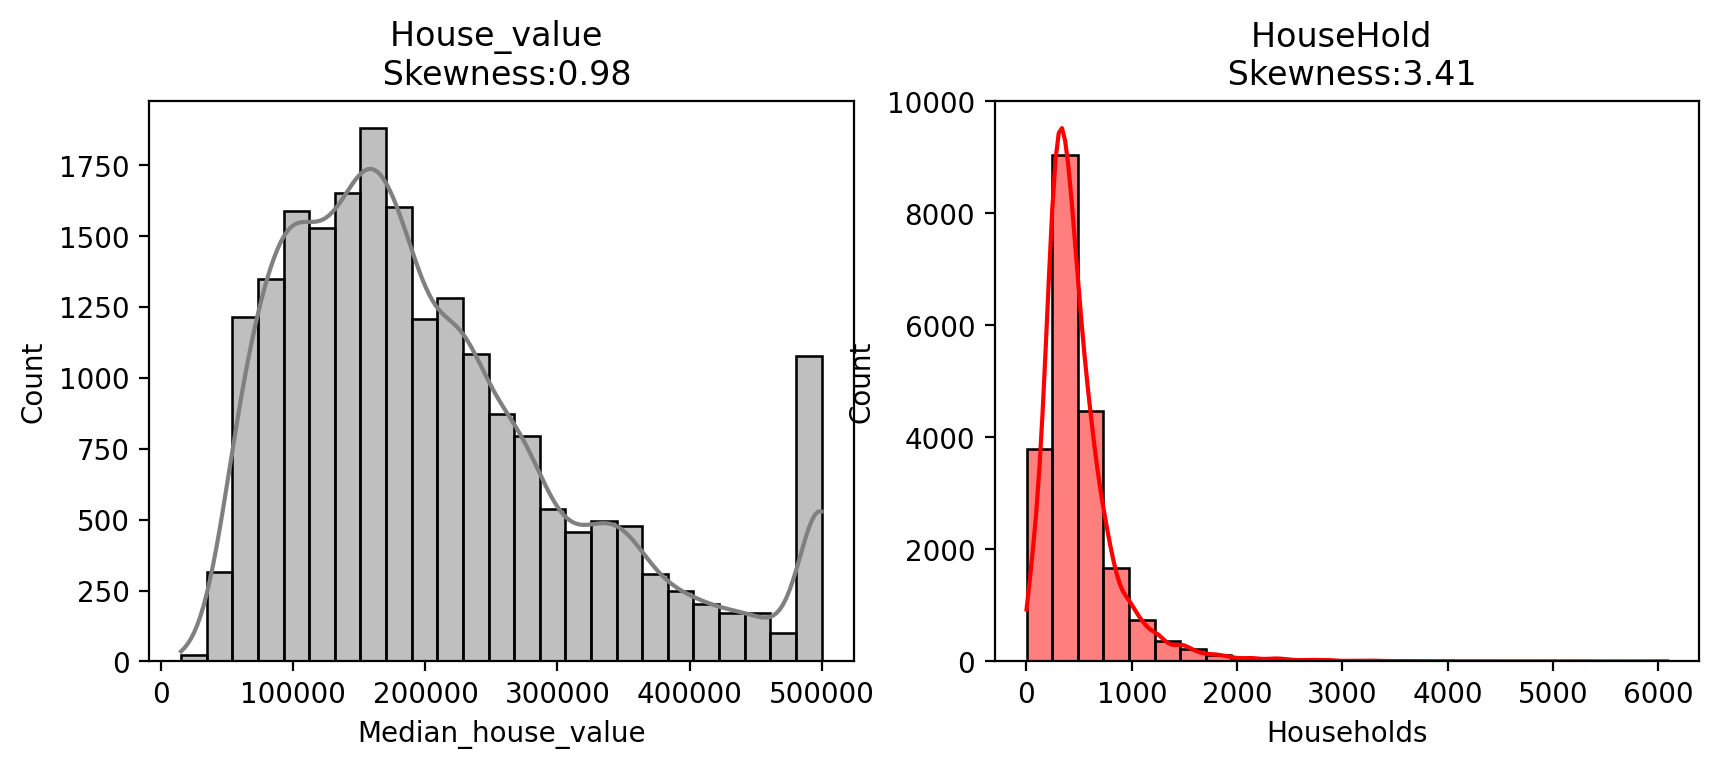

In [32]:
# Ploting skewness of each for understanding
# And findin the shape of skewness 
plt.figure(figsize=(10, 8), dpi=200)
plt.subplot(2,2,1)
sns.histplot(df['Median_house_value'],bins=25,kde=True,color='gray')
plt.title(f'House_value \n Skewness:{skew_house_val:.2f}')

plt.subplot(2,2,2)
sns.histplot(df['Households'],bins=25,kde=True,color='red')
plt.title(f'HouseHold \n Skewness:{skew_household:.2f}')



Text(0.5, 1.0, 'Income \n Skewness:1.65')

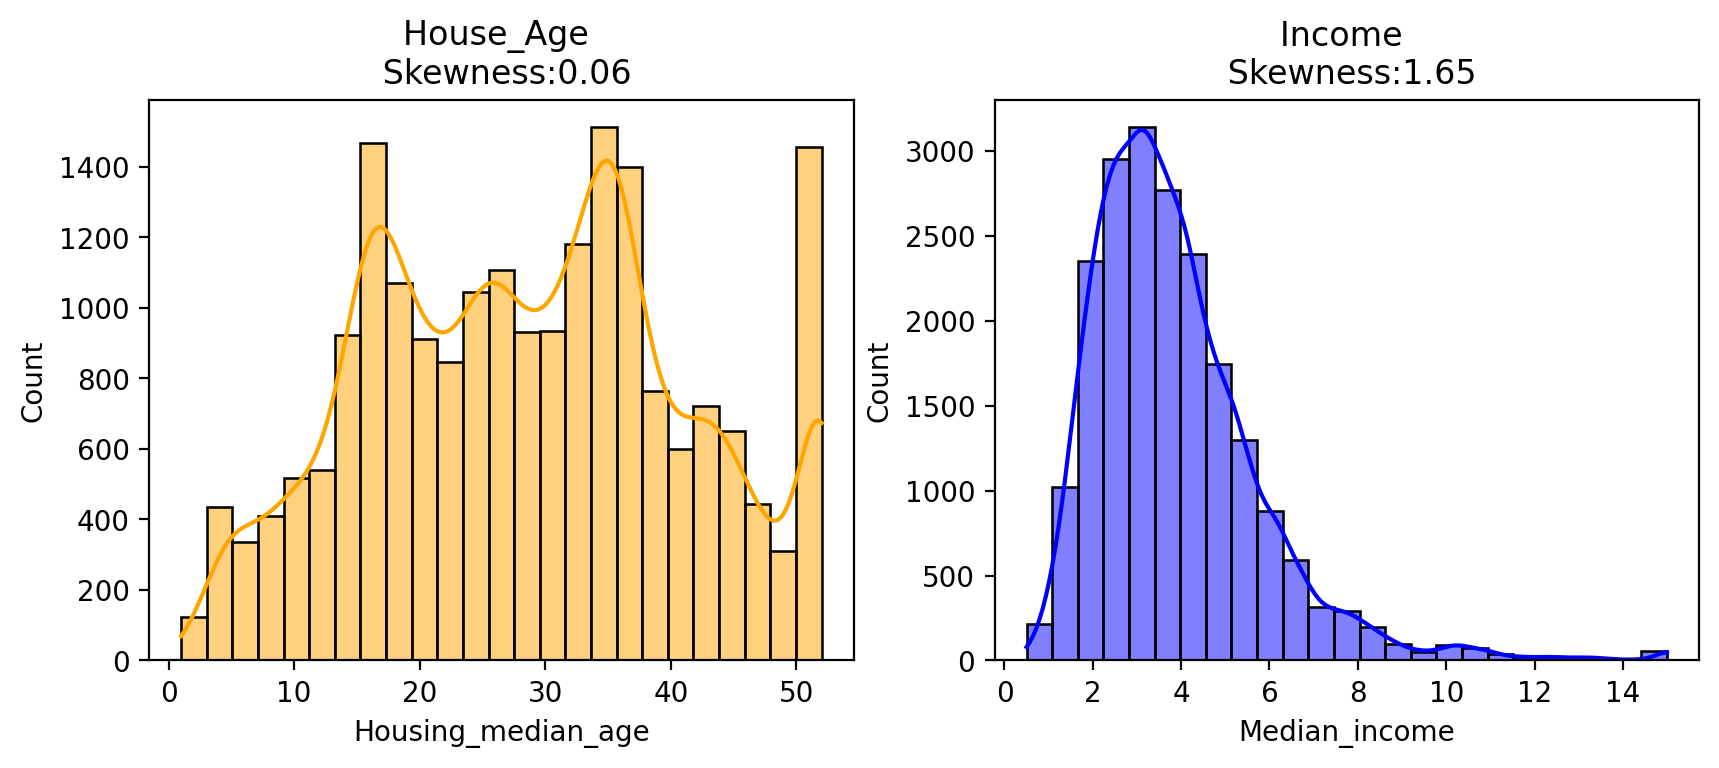

In [34]:
plt.figure(figsize=(10, 8), dpi=200)

plt.subplot(2,2,1)
sns.histplot(df['Housing_median_age'],bins=25,kde=True,color='orange')
plt.title(f'House_Age \n Skewness:{skew_house_age:.2f}')

plt.subplot(2,2,2)
sns.histplot(df['Median_income'],bins=25,kde=True,color='blue')
plt.title(f'Income \n Skewness:{skew_income:.2f}')


In [36]:
# ploting population 

skew_pop = stats.skew(df['Population'])  # Skewness of the population
q1 = np.percentile(df['Population'], 25)  # First quartile
q3 = np.percentile(df['Population'], 75)  # Third quartile
median = np.median(df['Population'])  # Median value
iqr = q3 - q1  # Interquartile range (IQR)
lower_fence = q1 - (1.5 * iqr)  # Lower bound for outliers
higher_fence = q3 + (1.5 * iqr)  # Upper bound for outliers

print(f"Q1 (Lower Quartile): {q1}")
print(f"Q3 (Upper Quartile): {q3}")
print(f"Median: {median}")
print(f"IQR: {iqr}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {higher_fence}")
print(f"Skewness: {skew_pop:.2f}")


Q1 (Lower Quartile): 787.0
Q3 (Upper Quartile): 1725.0
Median: 1166.0
IQR: 938.0
Lower Fence: -620.0
Upper Fence: 3132.0
Skewness: 4.94


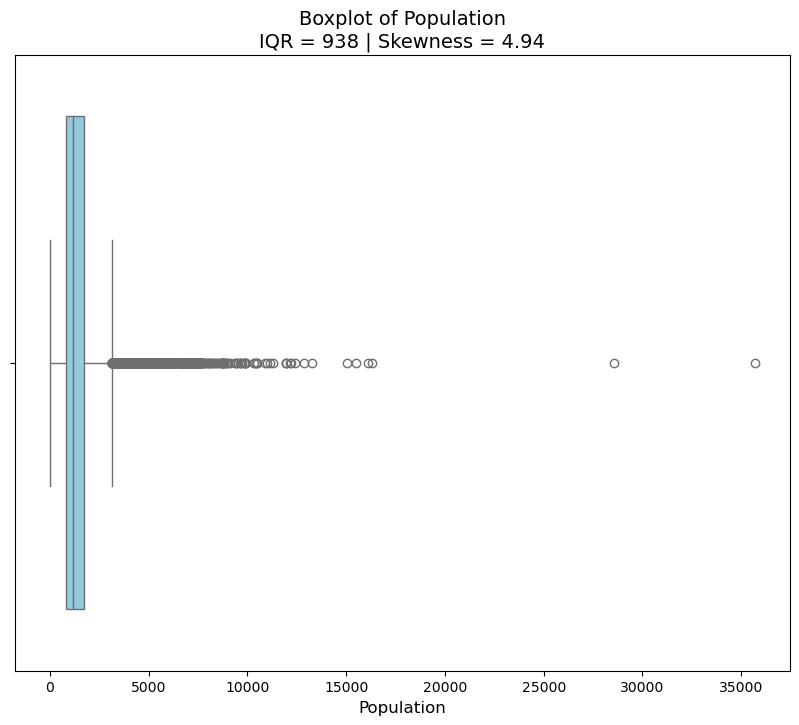

In [38]:
plt.figure(figsize=(10, 8)) 
sns.boxplot(x=df['Population'], color='skyblue') 
plt.title(f'Boxplot of Population\nIQR = {iqr:.0f} | Skewness = {skew_pop:.2f}', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.show()

# Hypothesis testing using Anova

In [41]:

anova_result=stats.f_oneway(df[df['Ocean_proximity']=='NEAR BAY']['Median_house_value'],
                            df[df['Ocean_proximity']=='ISLAND']['Median_house_value'],
                            df[df['Ocean_proximity']=='NEAR OCEAN']['Median_house_value'],
                            df[df['Ocean_proximity']=='INLAND']['Median_house_value'])

# Print the result
print(f'ANOVA test result: F-statistic={anova_result.statistic:.2f},p-value={anova_result.pvalue:.4f}')

# Interpreting the p-value:
if anova_result.pvalue < 0.05:
    print("There is a significant difference in house values across different regions.")
else:
    print("There is no significant difference in house values across different regions.")


ANOVA test result: F-statistic=1703.69,p-value=0.0000
There is a significant difference in house values across different regions.


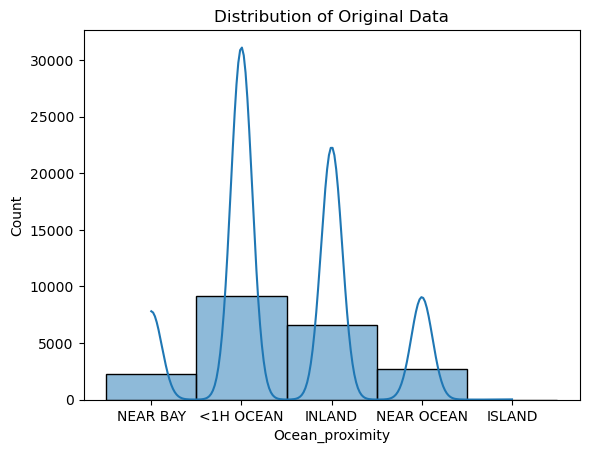

In [43]:

sns.histplot(df['Ocean_proximity'], kde=True)
plt.title('Distribution of Original Data')
plt.show()

# Data Transformation 

In [46]:
# Using LabelEncoder ecoder to Categorical data
LabelScale=LabelEncoder()
LabelScale = LabelEncoder()
df['Ocean_proximity'] = LabelScale.fit_transform(df['Ocean_proximity'])

Scaler=RobustScaler()
df[['Longitude','Latitude','Housing_median_age','Total_rooms','Total_bedrooms','Population','Households','Median_income','Median_house_value']]=Scaler.fit_transform(df[['Longitude','Latitude','Housing_median_age','Total_rooms','Total_bedrooms','Population','Households','Median_income','Median_house_value']])
df.head()

,Longitude,Latitude,Housing_median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Ocean_proximity,Median_house_value
0,-0.986807,0.957672,0.631579,-0.733422,-0.892419,-0.899787,-0.870769,2.197582,3,1.880448
1,-0.984169,0.952381,-0.421053,2.924276,1.929242,1.316631,2.243077,2.186664,3,1.232041
2,-0.989446,0.949735,1.210526,-0.388178,-0.716245,-0.714286,-0.713846,1.707732,3,1.187941
3,-0.992084,0.949735,1.210526,-0.501691,-0.586282,-0.648188,-0.584615,0.967177,3,1.113523
4,-0.992084,0.949735,1.210526,-0.294074,-0.456318,-0.640725,-0.461538,0.142854,3,1.119724


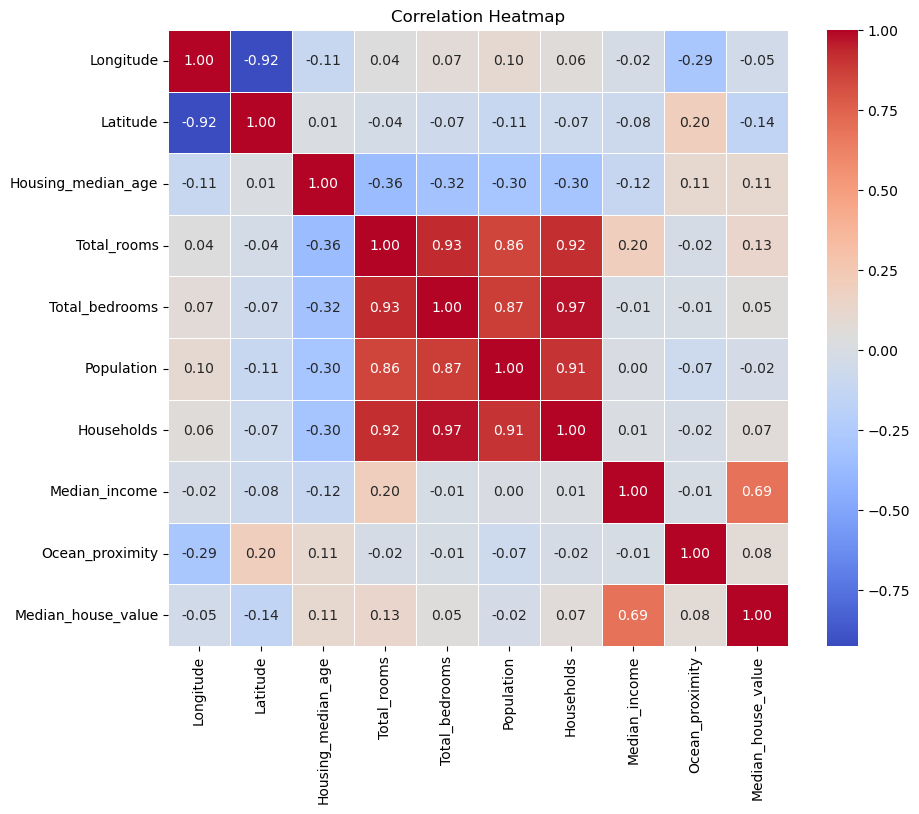

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Principal Component Analysis

In [58]:
# Converting high dimentional data into 2 dimention
pca=PCA(n_components=2)
pca_reduction=pca.fit_transform(df)
pca_df=pd.DataFrame(pca_reduction,columns=['PC1','PC2'])
pca_df

,PC1,PC2
0,-2.300278,2.055853
1,3.681529,2.225847
2,-1.956139,2.049722
3,-1.879275,2.036416
4,-1.666277,2.041480
...,...,...
20635,-1.139581,-0.127199
20636,-2.282665,-0.187956
20637,-0.515860,-0.109654
20638,-1.012512,-0.123008


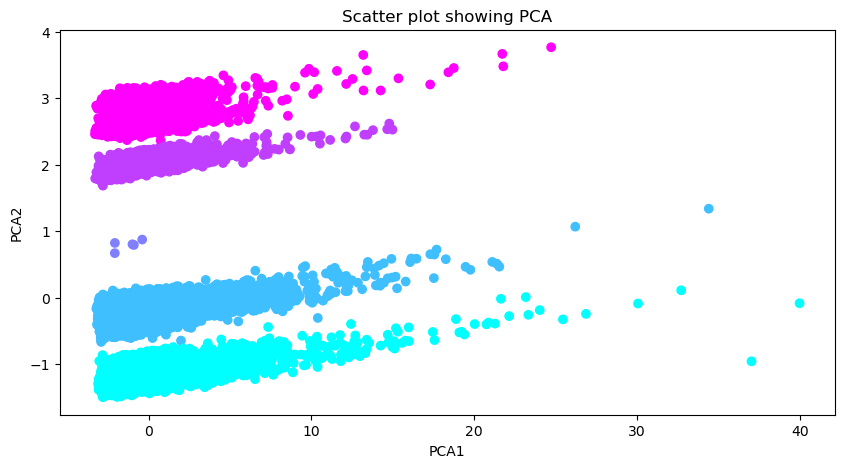

In [80]:
# ploting pca According to Ocean_proximity

plt.figure(figsize=(10,5),dpi=100)
plt.scatter(pca_df['PC1'],pca_df['PC2'],c=df['Ocean_proximity'],cmap='cool')
plt.title('Scatter plot showing PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Linear regression to the Model

In [97]:
X=df[['Longitude', 'Latitude', 'Housing_median_age', 'Total_rooms', 'Total_bedrooms','Population', 'Households', 'Median_income']]
y=df['Median_house_value']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=50)

Lr_model=LinearRegression()
Lr_model_result=Lr_model.fit(X_train,y_train)
y_pred=Lr_model.predict(X_test)


In [99]:
# Evaluating the model
mse=mean_squared_error(y_test,y_pred)
rme=mse**0.5
r2=r2_score(y_test,y_pred)
print('Mean Square Error:',mse)
print('Root Square Error:',rme)
print('R_ squared:',r2)

Mean Square Error: 0.22790655810768534
Root Square Error: 0.47739559917084
R_ squared: 0.6358282782545828


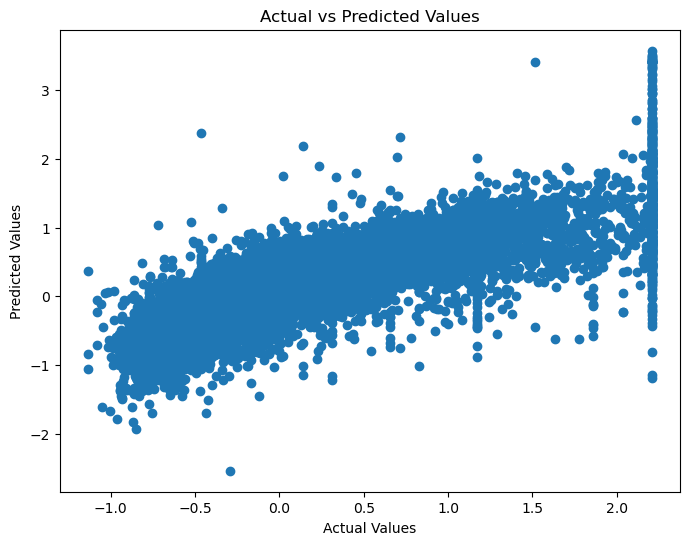

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


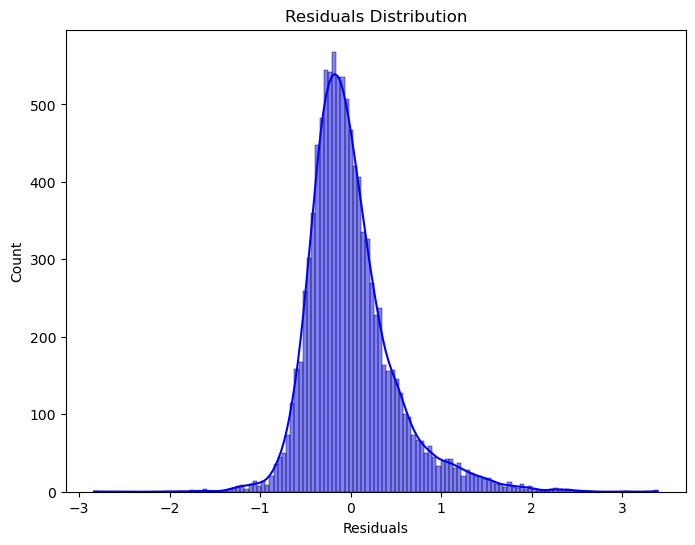

In [103]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()


# Export file


In [108]:
df.to_csv("C:/Users/nithi/OneDrive/Desktop/processed_housing.csv", index=False)